# Labrapport TFY4125 Fysikk Vår 2024
*Skriv fullt navn på gruppas medlemmer samt dato for innlevering.*

Navn: Christian Fredrik Johnsen,
Kristian Underdal,
David Tuan Kiet Tran, 
Sindre André Svendsrud Torp og
Mohand Makhtari <br>
Institutt for Fysikk, NTNU <br>
Dato: 6/3-2025A

## Sammendrag

I dette labprosjektet har vi rullet kule på en bane som var 1.5 meter lang. Vi målte farten til kulen, og sammenlignet teoretisk fart med faktisk målt fart. Vi finner at den teoretiske farten stemmer veldig bra med faktisk målt fart. Mekanisk energi er tilnærmet bevart i alle tilfeller. Midlere tap i mekanisk energi er 15.91mJ og standardavviket er 3.4mJ.

## Ren rulling på krum bane - teoretisk grunnlag
Figuren nedenfor viser ei kule som ruller på et krumt underlag, med krumning henholdsvis oppover (øverst) og nedover (nederst). I figuren angis tyngdekraften $Mg$ og de to komponentene av kontaktkraften fra underlaget på kula, henholdsvis normalkraften $N$ og friksjonskraften $f$. Dessuten er både hastigheten $v$, baneakselerasjonen $a$ og sentripetalakselerasjonen $a_\perp$ illustrert. Ved perfekt ren rulling - uten andre former for friksjon enn den statiske friksjonen $f$ som virker i kontaktpunktet mellom kula og underlaget - er kulas mekaniske energi bevart. Da er kulas hastighet entydig bestemt av endringen $y$ i den vertikale posisjonen til kulas massesenter via
$$\frac{1}{2} (1+c) Mv^2 = Mgy,$$
idet vi antar at kula starter med hastighet $v=0$ i høyden $y=0$. Dersom kula er kompakt med uniform massefordeling, er $c=2/5$, slik at 
$$v(y) = \sqrt{\frac{10}{7}gy}.$$
Kulas baneakselerasjon blir dermed 
$$a = \frac{dv}{dt} = \frac{dv}{dy}\,\frac{dy}{dt} = \sqrt{\frac{5g}{14y}}\,v_y.$$
Her er $v_y = v \sin\beta = \sqrt{10gy/7}\sin\beta$ slik at
$$a = -\frac{5g\sin\beta}{7}.$$
Her er $\beta$ banens lokale helningsvinkel, knyttet til banens geometriske form $y(x)$ ved at
$$\frac{dy}{dx} = \tan\beta.$$
Vi innser nå at de to siste ligningene har konsistente fortegn: Kula ruller åpenbart saktere og saktere i motbakke.
Da er både $\sin\beta$ og $\tan\beta$ positive størrelser dersom $\beta > 0$.
Friksjonskraften kan nå bestemmes ved hjelp av Newtons 2. lov:
$$f - Mg\sin\beta = Ma = -\frac{5Mg\sin\beta}{7},$$
dvs
$$f = \frac{2Mg\sin\beta}{7}.$$
Retningen på $f$ må være konsistent med at vinkelfarten øker i nedoverbakke og minker i oppoverbakke. Av den grunn peker $f$ alltid oppover langs banen. Vi ser at fortegnet stemmer: Motbakke og $\beta > 0$ gir $f>0$, dvs framover og oppover. Utforbakke og $\beta < 0$ gir $f<0$, dvs bakover og oppover. <br>
Endelig kan normalkraften bestemmes ved hjelp av Newtons 2. lov i retning normalt på banen:
$$N - Mg\cos\beta = M a_\perp = M v^2/R = Mv^2K.$$
Her er $R$ banens krumningsradius og $K$ krumningen, gitt ved
$$K = \frac{y''}{[1+(y')^2]^{3/2}},$$
med $y' = dy/dx$ og $y'' = d^2y/dx^2$. Normalkraften har selvsagt retning oppover til enhver tid (dvs med positiv $y$-komponent). Sentripetalakselerasjonen har retning inn mot sentrum av den tenkte sirkelen med radius $R$. Når banen krummer oppover, er $y'' > 0$ og $K > 0$ i siste ligning. Det betyr at fortegnet stemmer: $N$ er større enn tyngdens normalkomponent $Mg\cos\beta$ når banen krummer oppover. Og omvendt: Når banen krummer nedover, er $y'' < 0$ og $K < 0$ i siste ligning. Det gir en normalkraft $N$ som er mindre enn tyngdens normalkomponent. Av erfaring vet vi at dette stemmer: Kjører vi fort nok på ski over en 'kul', kan vi helt miste kontakten med underlaget, dvs $N=0$. Her skal vi sørge for at baneformen $y(x)$ er slik at den rullende kula hele tiden har god kontakt med underlaget.

Mekanisk energi $E$ består av potensiell energi $E_{pot}$ og kinetisk energi $E_{kin}$:
$$ E = E_{pot} + E_{kin}.$$

Den potensielle energien er gitt ved mgh. Den totale kinetiske energien til en rullende kule er summen av translasjonsenergien $mv^2/2$ og rotasjonsenergien $cmv^2/2$.


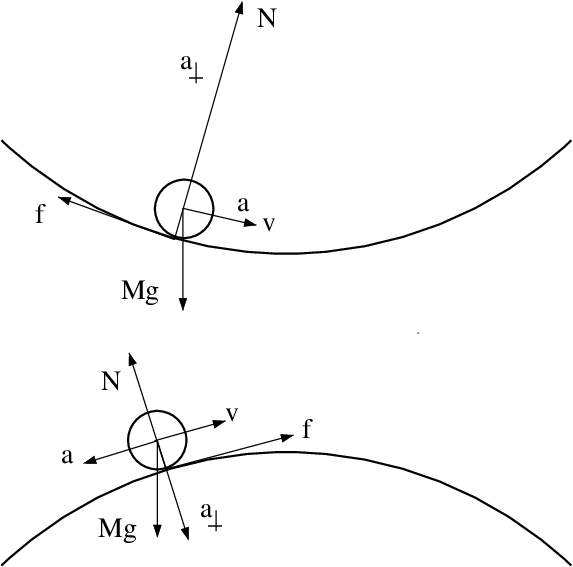

In [75]:
from IPython import display
display.Image("./krefter.png", width=400)

<b>Figur 1.</b> Kule som ruller på et krumt underlag. Her er $v$ kulas fart,
$a$ er baneakselerasjon, $a_\perp$ er sentripetalakselerasjon, $Mg$ er tyngdekraft,
$f$ er friksjonskraft og $N$ er normalkraft. Banens helningsvinkel $\beta$ er vinkelen mellom
positiv $x$-akse (horisontal og mot høyre) og retningen til $v$. <br><br>

## Baneform med kubiske *splines*

Baneformen fastlegges ved hjelp av tredjegradspolynomer på de 7 intervallene mellom de 8 tilfeldig valgte skruefestehøydene, slik at både banen $y(x)$, banens deriverte $dy/dx$ og banens andrederiverte $d^2y/dx^2$ er kontinuerlige i skruefestene. Dette gjøres i Python med funksjonen CubicSpline fra SciPy-biblioteket interpolate med kommandoen

*cs = CubicSpline(xfast,yfast,bc_type='natural')*

Her er xfast og yfast tabeller (numpy arrays) med henholdsvis horisontale og vertikale koordinater for skruefestene, og med *bc_type='natural'* velges krumning lik null i de to ytterste skruefestene. Horisontal avstand mellom skruefestene er 200 mm slik at xfast = (0,0.200,...,1.400) m. Vertikale koordinater for skruefestene fastlegges ved å trekke tilfeldige tall med numpy-funksjonen random.randint.


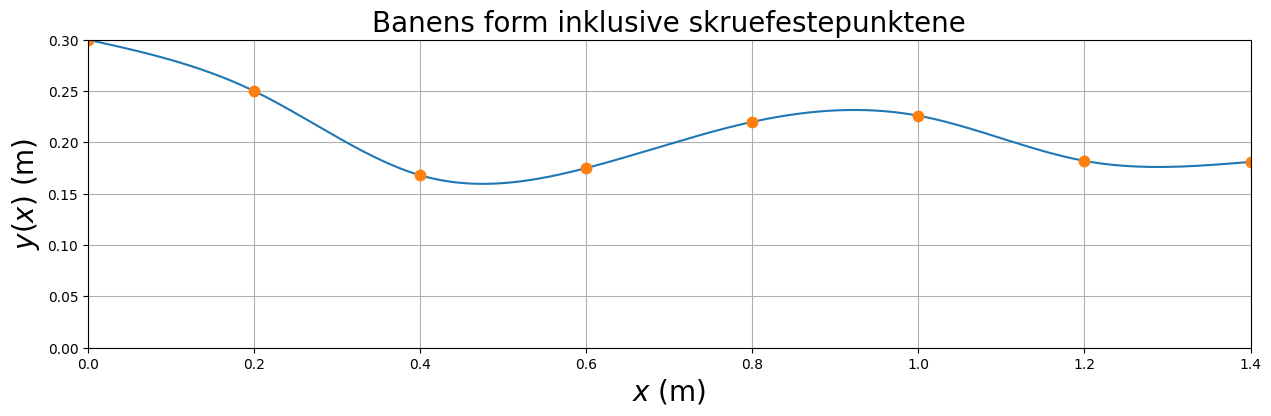

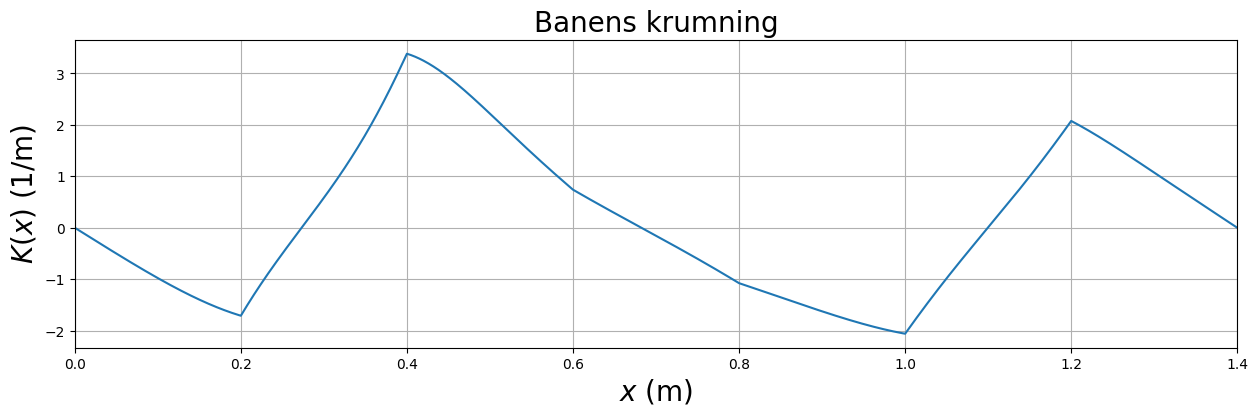

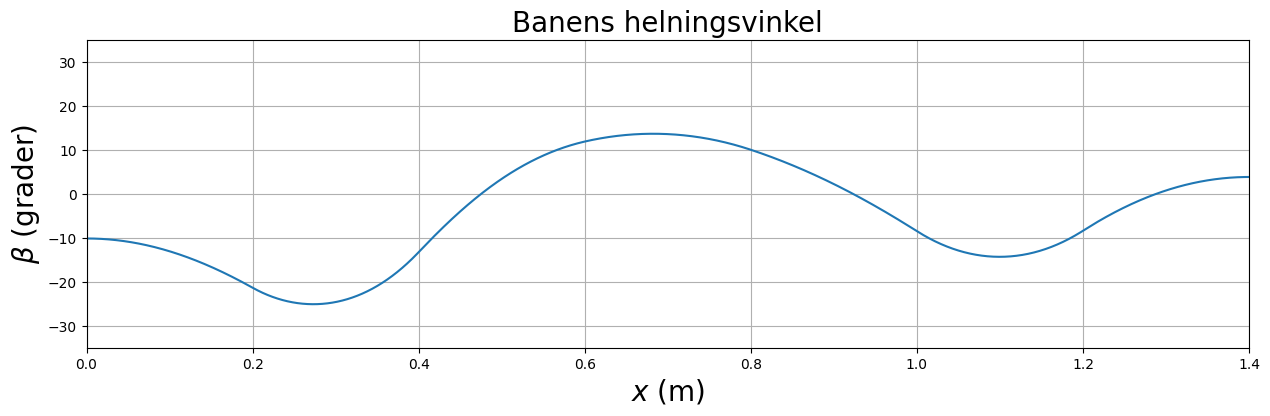

Bakketoppens høyeste punkt (m):  0.232
Banens laveste punkt (m):  0.160
Helningsvinkel i startposisjonen (grader): -10.2
Banens maksimale helningsvinkel (grader): 25.1
De 8 festepunkthøydene (m): [0.3   0.25  0.168 0.175 0.22  0.226 0.182 0.181]


In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

#Tallverdier. Tryggest med SI-enheter fra start til mål!
M = 0.031    #kg
g = 9.81     #m/s**2
c = 2/5
h = 0.200    #m
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1.401
dx = 0.001
x = np.arange(xmin, xmax, dx)
Nx = len(x)

#Skruehøyder:
### Genereringskode er kommentert ut, actual valz come under.
# yfast = np.zeros(8)
# yfast[0] = 0.300
# yfast[1] = yfast[0] - np.random.randint(40,60)/1000
# yfast[2] = yfast[1] - np.random.randint(70,90)/1000
# yfast[3] = yfast[2] + np.random.randint(-30,10)/1000
# yfast[4] = yfast[3] + np.random.randint(30,70)/1000
# yfast[5] = yfast[4] + np.random.randint(-20,20)/1000
# yfast[6] = yfast[5] - np.random.randint(40,80)/1000
# yfast[7] = yfast[6] + np.random.randint(-40,40)/1000

#Kjør denne cellen så mange ganger dere vil, inntil dere får en baneform dere er fornøyd med.
#Når endelig baneform er valgt:
#Sett inn skruehøydene med 3 desimaler (m) og fjern kommentarsymbolet ("#") i neste linje.
yfast = np.asarray([0.3,0.25,0.168,0.175,0.22,0.226,0.182,0.181])
#Når endelig baneform er valgt, kan dere gjerne legge inn # i starten på de 8 linjene som beregner yfast[] ovenfor

#Beregninger:
# CubicSpline tar inn de åtte festepunktene og interpolerer mellom dem slik at vi får en glatt kurve mellom festepunktene. 
# Den glatte kurven beskriver da posisjonen til kulen. Funksjonen som CubicSpline gir ut (her kalt cs) kan ta i mot et array med
# x-posisjoner som argument. Da vil den gi ut de tilsvarene y-posisjonene langs den glatte banen. 
cs = CubicSpline(xfast, yfast, bc_type='natural')
#y = baneformen y(x)
y = cs(x)
# dydx = dy/dx = y'(x) (dimensjonsløs)
dydx = cs(x,1)
# d2ydx2 = y''(x) (enhet 1/m)
d2ydx2 = cs(x,2)
# K = 1/R = banens krumning (1/m)
K = d2ydx2/(1+dydx**2)**(1.5)
# beta = banens helningsvinkel (rad)
beta = np.arctan(dydx)
#betadeg = banens helningsvinkel (grader)
betadeg = beta*180/np.pi
#startvinkel = helningsvinkel i startposisjonen (grader)
startvinkel = betadeg[0]
#maksvinkel = banens maksimale helningsvinkel, i absoluttverdi (grader)
maksvinkel = np.max(np.abs(betadeg))

#Plotting av banens form y(x)
plt.figure(figsize=(15,4))
plt.plot(x,y)
plt.plot(xfast,yfast,'.',markersize=15)
plt.title('Banens form inklusive skruefestepunktene',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0,0.300)
plt.xlim(0,1.400)
plt.grid()
plt.show()

#Plotting av banens krumning
plt.figure(figsize=(15,4))
plt.plot(x,K)
plt.title('Banens krumning',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$K(x)$ (1/m)',fontsize=20)
plt.xlim(0,1.400)
plt.grid()
plt.show()


#Plotting av banens helningsvinkel
plt.figure(figsize=(15,4))
plt.plot(x,betadeg)
plt.title('Banens helningsvinkel',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel(r'$\beta$ (grader)',fontsize=20)
plt.ylim(-35,35)
plt.xlim(0,1.400)
plt.grid()
plt.show()

y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
print('Bakketoppens høyeste punkt (m): %6.3f' %y37max)
print('Banens laveste punkt (m): %6.3f' %y27min)
print('Helningsvinkel i startposisjonen (grader): %4.1f' %startvinkel)
print('Banens maksimale helningsvinkel (grader): %4.1f' %maksvinkel)
print('De 8 festepunkthøydene (m):', yfast)

## Numerisk beregnede fysiske størrelser
*I neste celle skal dere beregne sentrale fysiske størrelser med utgangspunkt i den valgte baneformen. Fullfør cellen med nødvendig kode slik at de ulike størrelsene beregnes og plottes i pene figurer, i samme format som figurene ovenfor. Husk enhet på alle akser. Der flere kurver vises i samme figur må det framgå hva hver enkelt kurve framstiller. Følgende størrelser skal beregnes og plottes:*
* Beregn kulas hastighet (m/s) og plott den mot horisontal posisjon $x$ (m): 
$$v(x)=\sqrt{\frac{10g[y(0)-y(x)]}{7}}$$
* Beregn normalkraft $N$ og friksjonskraft $f$ (N) og plott dem i samme figur mot $x$ (m): <br>
$$N = Mg\cos\beta + M v^2K$$
$$f = \frac{2Mg\sin\beta}{7}$$
* Beregn forholdet $|f/N|$ og plott det mot $x$ (m). <br>
* Beregn kulas hastighet $v$ (m/s) og plott den mot tiden $t$ (s). <br>
* Beregn potensiell energi, kinetisk energi (translasjonsenergi og rotasjonsenergi) og total energi (J) og plott de i samme figur mot $x$ (m). <br>

*Skriv til slutt ut tallverdier for kulas rulletid (s), slutthastighet (m/s) og tilhørende total mekanisk energi (J).* 

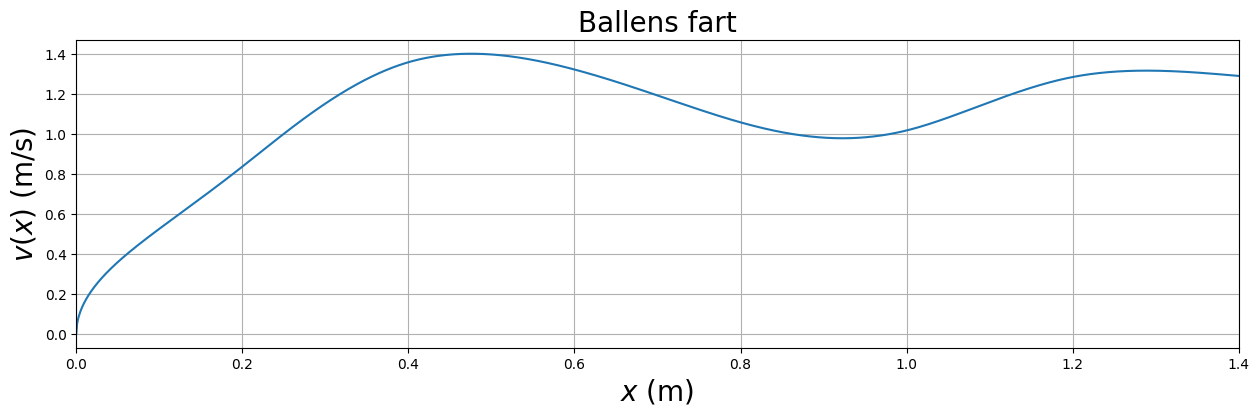

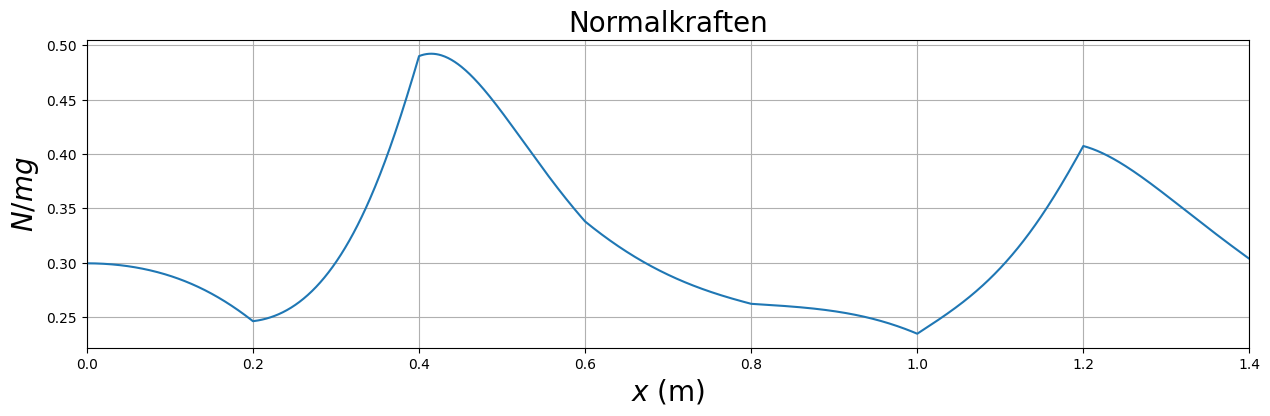

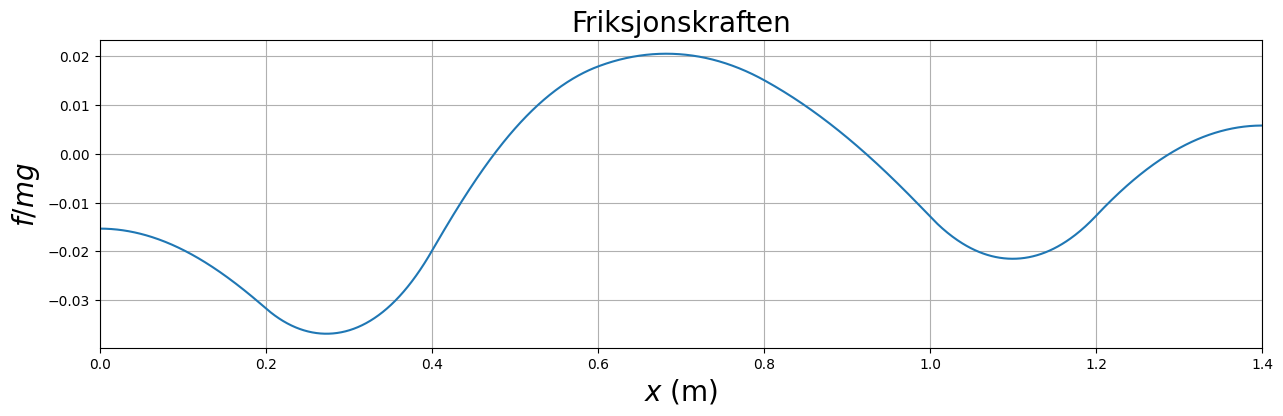

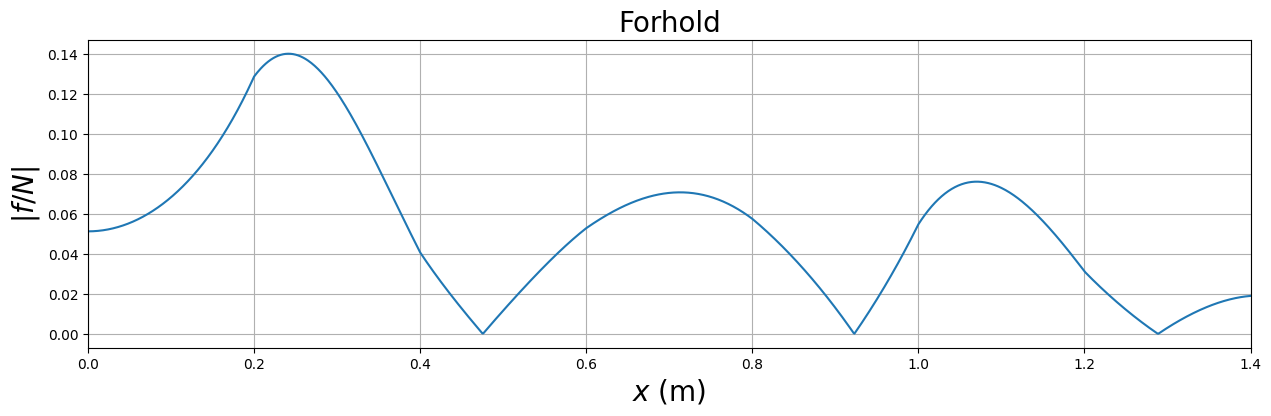

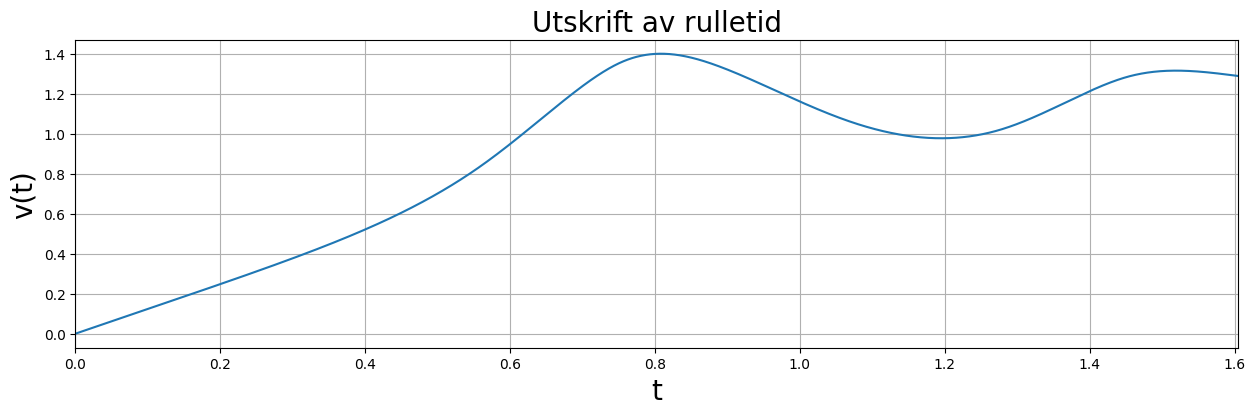

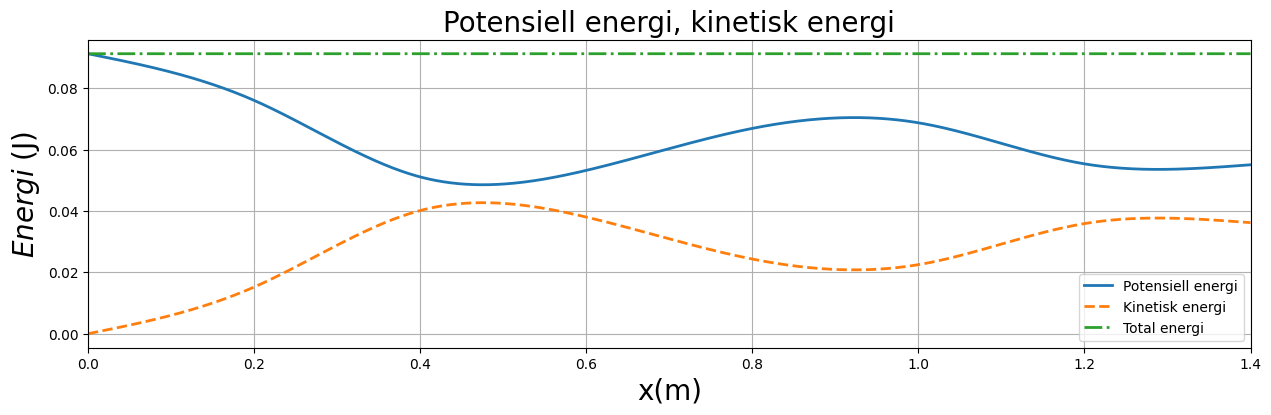

In [77]:
#Numerisk beregning og plotting av de fysiske størrelsene v(x), N(x), f(x), |f/N|, v(t), Epot(x), Ekin(x), Etot(x)

v = (10/7 * g * (y[0] - y))**(1/2) # Ballens hastighet

N = M * g * np.cos(beta) + M * v**2 * K # Normalkraften

f = 2/7 * M * g * np.sin(beta) # Friksjonskraften

f_over_N = np.absolute(f / N) # Forholdet |f/N|

v_x = v * np.cos(beta) # Ballens hastighet i x-retning

delta_t = np.zeros(x.shape[0])
delta_t[0] = 0
for i in range(1, x.shape[0]):
    delta_t[i] = 2*dx / (v_x[i-1] + v_x[i])

t_x = np.cumsum(delta_t)

Epot = M * g * y # Potensiell energi
Ekin = (1 + c) / 2 * M * v**2 # Kinetisk energi
Etot = Epot + Ekin # Total mekanisk energi


# Plotting av ballens hastighet
plt.figure(figsize=(15,4))
plt.plot(x,v)
plt.title('Ballens fart',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v(x)$ (m/s)',fontsize=20)
plt.xlim(0,1.4)
plt.grid()
plt.show()


# Plotting av Normalkraften
plt.figure(figsize=(15,4))
plt.plot(x,N)
plt.title('Normalkraften',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$N/mg$',fontsize=20)
plt.xlim(0,1.400)
plt.grid()
plt.show()

# Plotting av Friksjonskraften
plt.figure(figsize=(15,4))
plt.plot(x,f)
plt.title('Friksjonskraften',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$f/mg$',fontsize=20)
plt.xlim(0,1.400)
plt.grid()
plt.show()

# Plotting av forhold mellom Normalkraften og Friksjonskraften
plt.figure(figsize=(15,4))
plt.plot(x,f_over_N)
plt.title('Forhold',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$|f/N|$',fontsize=20)
plt.xlim(0,1.400)
plt.grid()
plt.show()

#Utskrift av rulletid, sluttfart, total mekanisk energi
# plott v(t) mot tiden t(s)

plt.figure(figsize=(15,4))
plt.plot(t_x, v)
plt.title('Utskrift av rulletid',fontsize=20)
plt.xlabel('t',fontsize=20)
plt.ylabel('v(t)',fontsize=20)
plt.xlim(0,t_x[-1])
plt.grid()
plt.show() 



# Beregn potensiell energi, kinetisk energi (translasjonsenergi og rotasjonsenergi) 
# og total energi (J) og plott de i samme figur mot x(m)

plt.figure(figsize=(15,4))
plt.plot(x, Epot, label='Potensiell energi', linestyle='-', linewidth=2)
plt.plot(x, Ekin, label='Kinetisk energi', linestyle='--', linewidth=2)
plt.plot(x, Etot, label='Total energi', linestyle='-.', linewidth=2)
plt.title('Potensiell energi, kinetisk energi',fontsize=20)
plt.xlabel('x(m)',fontsize=20)
plt.ylabel('$Energi$ (J)',fontsize=20)
plt.xlim(0,1.400)
plt.legend()
plt.grid()
plt.show()

## Numerisk vs eksperimentell bane

*Fra Tracker har dere eksportert eksperimentelle tallverdier for (t,x,y) til en tekstfil, f eks data.txt. Legg til tekstfilen i samme mappe som notebooken. I neste celle skriver dere kode som leser innholdet i data.txt og oppretter numpy arrays for (t,x,y). Det holder å lese inn data fra <b>ett</b> rulleforsøk. Slik importeres semikolonseparerte data fra en tekstfil data.txt:*
```python
import pandas as pd
data=pd.read_csv("data.txt",sep=";")
t_exp=np.array(data["t"])
x_exp=np.array(data["x"])
y_exp=np.array(data["y"])
```
*t_exp, x_exp og y_exp er nå tabeller (numpy arrays) med de verdiene som ble vist i kolonnene i Tracker. Første linje i fila data.txt må være <br><br>
t;x;y <br><br>
Deretter følger tallverdier for t, x og y fra og med 2. linje, f eks <br><br>
0.300;0.0016;0.3001 <br>
0.334;0.0022;0.2995 <br>
... <br><br>
Lag en figur som viser både numerisk og eksperimentell bane, dvs y plottet mot x og y_exp plottet mot x_exp, i samme figur.* 

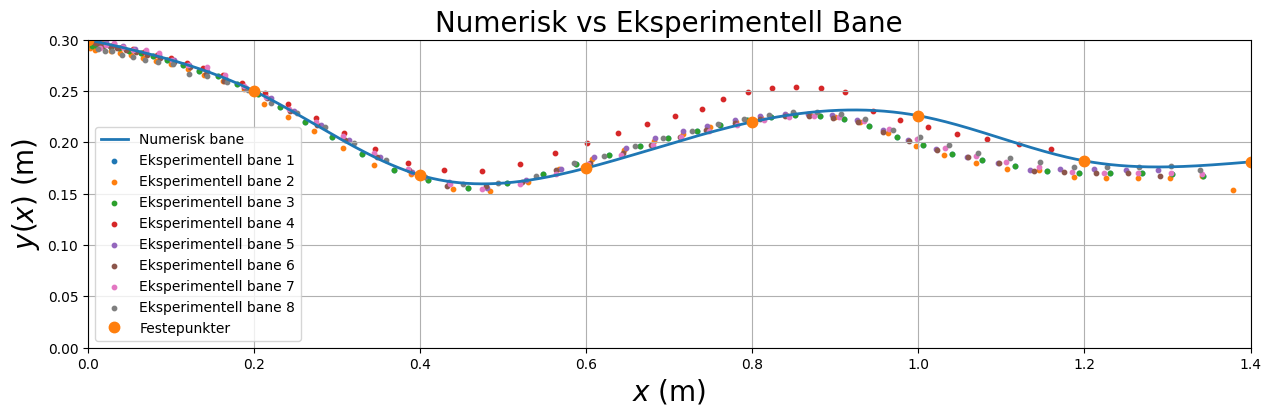

In [78]:
# Innlesing av eksperimentelle verdier for t, x og y
# THIS SECTION IS DONE, NOT TESTED YET, BUT I FEEL IT'S GOOD!
import pandas as pd

# Function to clean and convert values
def clean_number(value):
    return float(value.replace("−", "-").replace(",", "."))  # Fix minus and comma

#Plotting av numerisk og eksperimentell bane
# Med mine egne ord ville jeg heller sagt teoretisk VS faktisk bane [Christian]

# Numerisk bane
h = 0.200 # Horizontal distance between each screw position
xfast = np.asarray([0,1,2,3,4,5,6,7]) * h
xmin, xmax, dx = 0, 1.401, 0.001
x = np.arange(xmin, xmax, dx)

yfast = np.asarray([0.3,0.25,0.168,0.175,0.22,0.226,0.182,0.181])
cs = CubicSpline(xfast, yfast, bc_type='natural')
y = cs(x)

# Plotting av numerisk og eksperimentell bane
plt.figure(figsize=(15,4))
plt.plot(x, y, label="Numerisk bane", linewidth=2)

### Plotting av eksperimentelle baner
# Read CSV as pure strings
for i in range(1,9):

    data = pd.read_csv(f"data/data{i}.txt", sep=";", dtype=str)
    # Apply cleaning function to each column
    t_exp = np.array([clean_number(v) for v in data["t"]])
    x_exp = np.array([clean_number(v) for v in data["x"]])
    y_exp = np.array([clean_number(v) for v in data["y"]])

    plt.scatter(x_exp, y_exp, label=f"Eksperimentell bane {i}", s=10) # EKSPERIMENTELL BANE, s = size of markers




plt.plot(xfast, yfast, ".", markersize=15, label="Festepunkter")

plt.title("Numerisk vs Eksperimentell Bane", fontsize=20)
plt.xlabel("$x$ (m)", fontsize=20)
plt.ylabel("$y(x)$ (m)", fontsize=20)
plt.ylim(0, 0.300)
plt.xlim(0, 1.400)
plt.legend() # Added to code, show labels
plt.grid() 
plt.show()


## Numerisk vs eksperimentell hastighet

*I neste celle kan dere bruke numpyfunksjonen gradient til å beregne den eksperimentelle hastigheten til kula, både komponentene $v_x$ og $v_y$ og absoluttverdien $v = \sqrt{v_x^2+v_y^2}$. Tips:*
```python
vx_exp = np.gradient(x_exp,t_exp)
```
*På tilsvarende vis lages vy_exp, og deretter*
```python
v_exp = np.sqrt(vx_exp**2+vy_exp**2)
```
*Lag figurer som sammenligner numerisk og eksperimentell $v(x)$, $v(t)$ og $x(t)$. Det vil si plot numeriske og eksperimentelle størrelser i samme figur for hver av de tre størrelsene. Disse tre figurene gir et godt inntrykk av samsvaret mellom teoretisk og eksperimentell bevegelse.*

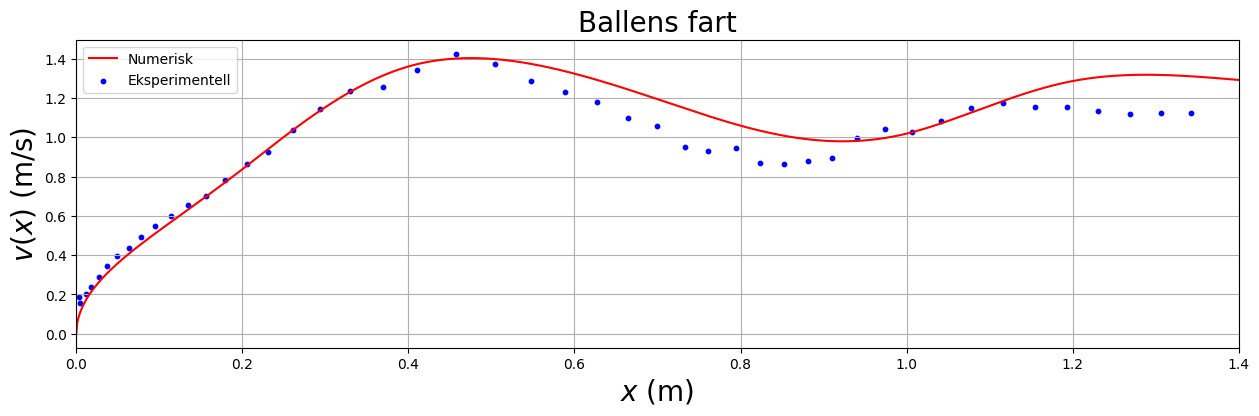

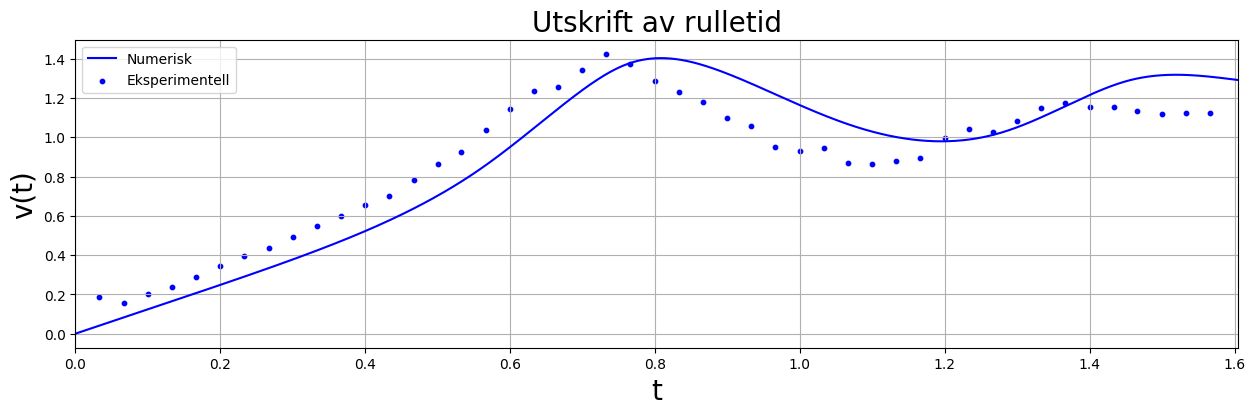

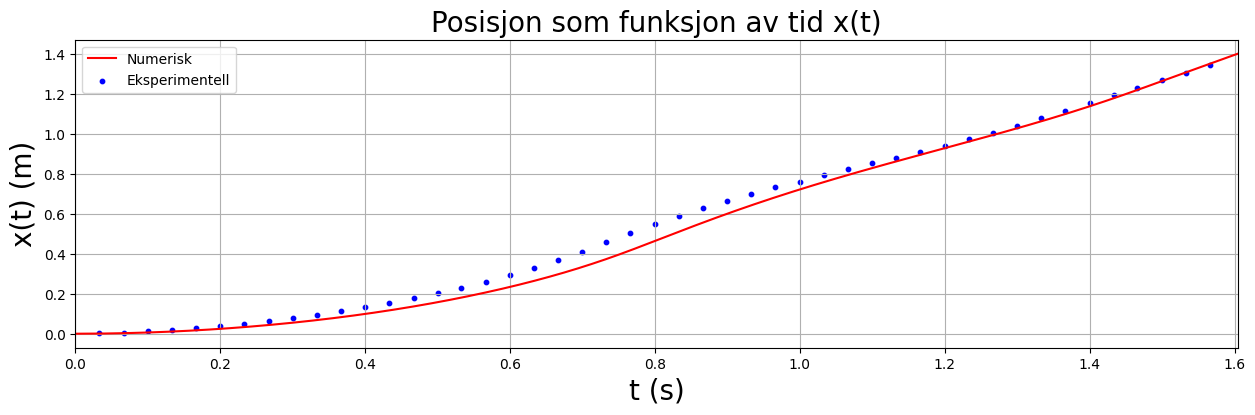

In [79]:
# VALG AV EKSPERIMENTELL BANE
data = pd.read_csv(f"data/data1.txt", sep=";", dtype=str)
t_exp = np.array([clean_number(v) for v in data["t"]])
x_exp = np.array([clean_number(v) for v in data["x"]])
y_exp = np.array([clean_number(v) for v in data["y"]])


#Beregning av eksperimentell v_x, v_y og v
vx_exp = np.gradient(x_exp, t_exp)
vy_exp = np.gradient(y_exp, t_exp)
v_exp = np.sqrt(vx_exp**2 + vy_exp**2)  # Absolutt fart


#Figurer som sammenligner numerisk og eksperimentell v(x), v(t) og x(t)

### v(x), v_x=numerisk, eksperimentell = ????
plt.figure(figsize=(15,4))
plt.plot(x,v, color="red", label="Numerisk")
plt.scatter(x_exp, v_exp, color="blue", s=10, label="Eksperimentell")  # Eksperimentell data
plt.title('Ballens fart',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v(x)$ (m/s)',fontsize=20)
plt.xlim(0,1.4)
plt.legend()
plt.grid()
plt.show()

### v(t)
plt.figure(figsize=(15,4))
plt.plot(t_x, v, color="blue", label="Numerisk")
plt.scatter(t_exp, v_exp, color="blue", s=10, label="Eksperimentell")  # Eksperimentell data
plt.title('Utskrift av rulletid',fontsize=20)
plt.xlabel('t',fontsize=20)
plt.ylabel('v(t)',fontsize=20)
plt.xlim(0,t_x[-1])
plt.legend()
plt.grid()
plt.show() 

### x(t) Numerisk VS Eksperimentell
plt.figure(figsize=(15,4))
plt.plot(t_x, x, color="red", label="Numerisk")
plt.scatter(t_exp, x_exp, color="blue", s=10, label="Eksperimentell") # Eksperimentell data
plt.title("Posisjon som funksjon av tid x(t)", fontsize=20)
plt.xlabel("t (s)", fontsize=20)
plt.ylabel("x(t) (m)", fontsize=20)
plt.xlim(0, t_x[-1])
plt.legend()
plt.grid()
plt.show()

## Numeriske vs eksperimentelle mekaniske energier

*I neste celle beregner dere eksperimentelle mekaniske energier: Kinetisk energi (translasjonsenergi og rotasjonsenergi), potensiell energi og total mekanisk energi. Sammenlign numerisk og eksperimentell total mekanisk, kinetisk og potensiell energi i en og samme figur (i alt 6 kurver). Husk å markere hvilken kurve som er hva.*

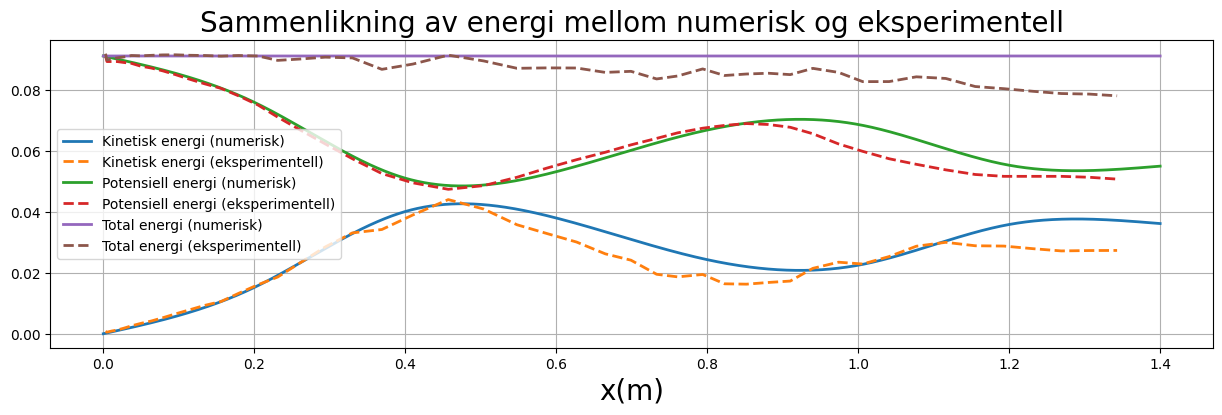

In [80]:
# VALG AV EKSPERIMENTELL BANE
data = pd.read_csv(f"data/data1.txt", sep=";", dtype=str)
t_exp = np.array([clean_number(v) for v in data["t"]])
x_exp = np.array([clean_number(v) for v in data["x"]])
y_exp = np.array([clean_number(v) for v in data["y"]])

#Beregning av eksperimentell Etrans_exp, Erot_exp, Ekin_exp, Epot_exp, Etot_exp
Epot_exp = M * g * y_exp
Ekin_exp = (1 + c) / 2 * M * v_exp**2
Etot_exp = Epot_exp + Ekin_exp


#Figurer som sammenligner numerisk og eksperimentell kinetisk, potensiell og total mekanisk energi

plt.figure(figsize=(15,4))
plt.title("Sammenlikning av energi mellom numerisk og eksperimentell",fontsize=20)

### kinetisk
plt.plot(x, Ekin, label='Kinetisk energi (numerisk)', linestyle='-', linewidth=2)
plt.plot(x_exp, Ekin_exp, label='Kinetisk energi (eksperimentell)', linestyle='--', linewidth=2)

### potensiell
plt.plot(x, Epot, label='Potensiell energi (numerisk)', linestyle='-', linewidth=2)
plt.plot(x_exp, Epot_exp, label='Potensiell energi (eksperimentell)', linestyle='--', linewidth=2)

### total mekanisk
plt.plot(x, Etot, label='Total energi (numerisk)', linestyle='-', linewidth=2)
plt.plot(x_exp, Etot_exp, label='Total energi (eksperimentell)', linestyle='--', linewidth=2)
plt.xlabel('x(m)',fontsize=20)
plt.legend()
plt.grid()
plt.show()

## Er den mekaniske energien bevart i rulleforsøkene?
*Fordel de 8 rulleforsøkene på gruppas medlemmer. For hvert rulleforsøk: Bruk posisjons- og fartsdata i start- og sluttpunktet fra Tracker til å beregne total mekanisk energi $E_i$ i startposisjonen (ved $x=0$) og $E_f$ i sluttposisjonen (ved $x=1.40$ m). I neste celle: Skriv de 8 verdiene for $E_i$ og $E_f$ inn i numpy arrays. Beregn 8 verdier for $\Delta E = E_i-E_f$ og deretter midlere tap i mekanisk energi med usikkerhet (den såkalte standardfeilen). Skriv ut resultatet på formen $\Delta E = (2.5 \pm 0.4)$ mJ, med egne tallverdier selvsagt. En passende enhet for $\Delta E$ er trolig mJ.*

In [81]:
from scipy.stats import sem

Ei_Ef = []

for i in range(1, 9):
    data = pd.read_csv(f"data/data{i}.txt", sep=";", dtype=str)
    t_exp = np.array([clean_number(v) for v in data["t"]])
    x_exp = np.array([clean_number(v) for v in data["x"]])
    y_exp = np.array([clean_number(v) for v in data["y"]])

    vx_exp = np.gradient(x_exp, t_exp)
    vy_exp = np.gradient(y_exp, t_exp)
    v_exp = np.sqrt(vx_exp**2 + vy_exp**2)

    Epot_exp_start = M * g * y_exp[0]
    Ekin_exp_start = (1 + c) / 2 * M * v_exp[0]**2
    Etot_exp_start = Epot_exp_start + Ekin_exp_start

    Epot_exp_slutt = M * g * y_exp[-1]
    Ekin_exp_slutt = (1 + c) / 2 * M * v_exp[-1]**2
    Etot_exp_slutt = Epot_exp_slutt + Ekin_exp_slutt

    Ei_Ef.append([Etot_exp_start, Etot_exp_slutt])

Ei_Ef = np.array(Ei_Ef)

#Beregning av Delta E = E_i - E_f for 8 vellykkede rulleforsøk

delta_e_liste = []

for i in range(0,8):
    delta_e = np.abs(Ei_Ef[i][0] - Ei_Ef[i][1])
    delta_e_liste.append(delta_e)

#Beregning av middelverdi og standardfeil for Delta E
middelverdi = np.average(delta_e_liste)*1000
standardfeil = sem(delta_e_liste)*1000

#Utskrift av Delta E på formen Delta E = (Middelverdi +- Standardfeil) mJ
print(f"({middelverdi:.2f}+-{standardfeil:.2f}) mJ")

(15.91+-3.40) mJ


## Noen avsluttende spørsmål
*De første spørsmålene tar utgangspunkt i de teoretiske (numeriske) resultatene:* <br>
Er grafen for $f(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt topp- og bunnpunktene, samt fortegnet på $f(x)$ underveis langs banen.
- Er grafen for $N(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt om $N$ har stor verdi på forventede steder.
- Maksimal statisk friksjonskraft er som kjent bestemt av $\mu_s N$. Hva må den statiske friksjonskoeffisienten $\mu_s$ mellom kule og bane minst være for at kula hele veien skal rulle rent uten å gli? Grafen for $|f(x)/N(x)|$ gir grunnlag for å svare på dette.
- Grafen for banens krumning $K(x)$ er kontinuerlig (sammenhengende), med tydelige knekkpunkter for hver 20. cm. Er dette som forventet? Forklar.
- I det teoretiske grunnlaget er det antatt at kulas radius er liten sammenlignet med banens krumningsradius. Er denne antagelsen i orden langs hele banen? Sammenlign kuleradien med banens minste krumningsradius.

*Det neste spørsmålet tar utgangspunkt i de eksperimentelle resultatene:*
- Er beregnet middelverdi og usikkerhet for tapt mekanisk energi i samsvar med antagelsen om at kula ruller rent uten å gli? I motsatt fall: Diskuter kort noen faktorer som kan bidra til at mekanisk energi går tapt i rulleforsøkene. <br>

*Det siste spørsmålet sammenligner de eksperimentelle resultatene med de teoretiske resultatene:* <br>
- Sammensvarer eksperimentelle og teoretiske resultater? Ta utgangspunkt i plottene for baneformen, hastighet og energi. Diskuter feilkilder som kan forklare forkjellene dere ser mellom deres eksperimentelle og teoretiske plot.


# Svar på avsluttende spørsmål

## Er grafen for N(x) rimelig?

Grafen for N(x) ser veldig rimelig ut når man sammenligner den md baneformen y(x). Normalkurven har sine toppunkt der baneformen krummer positivt og har sine bunnpunkt der baneformen krummer negativt. Dette stemmer med hva som er det forventede resultatet.

## Maksimal statisk friksjonskraft

For at kula skal rulle rent uten å gli, må den statiske friksjonskraften være stor nok til å sikre rullende bevegelse gjennom hele banen. Dette betyr at den maksimale statiske friksjonskraften $f_{s}$ må være større eller lik $μ_s \cdot N$. 

Dette medfører at den statiske friksjonskoeffisienten må minst være lik den maksimale verdien av $|\frac{f(x)}{N(x)}|$.

Utifra grafen kan vi se at den maksimale verdien av $|\frac{f}{N}|$ ≈ 0.14.
Dermed må den minste verdien av $μ_s$ være omtrent 0.14.

## Grafen for banens krumning

Grafen for krumningen K(x) viser tydelige knekkpunkter for hver 20 cm, noe som stemmer overens med festepunktene for banen. Disse punktene fungerer som fysiske støttepunkter, som påvirker hvordan banen bøyer seg.

Krumningen er ofte størst ved festepunktene fordi det er her banen må justere retning mest, men ikke nødvendigvis ved alle festepunktene. Den maksimale krumningen oppstår der banen har størst lokal bøying, noe som avhenger av høydeforskjellene mellom nabopunktene. Mellom festepunktene varierer krumningen mer jevnt, ofte på en tilnærmet lineær måte.

Dette er som forventet fordi banen er definert av et begrenset antall støttepunkter, og kurven mellom dem tilpasses med en jevn interpolasjon.
Grafen har tydelige knekkpunkter for hver 20 cm, fordi vi har festepunkter for banen hver 20 cm.

## Kulas radius er liten sammenlignet med banens krumningsradius

For å vurdere om antagelsen er gyldig, må vi sammenligne kulas radius $ r = 11  mm = .011 $ m med den minste krumningsradiusen langs banen.

Krumningsradiusen  $R(x)$ er gitt som den inverse av krumningen  $K(x)$:

$$
R(x) = \frac{1}{|K(x)|}
$$

Fra grafen ser vi at den største verdien av $ |K(x)| $ er omtrent **3.5** $ \text{m}^{-1} $, noe som gir en **minste krumningsradius** på:

$$
R_{\min} = \frac{1}{3.5} \approx 0.286 \text{ m}
$$

Siden **kulas radius $ (0.011 \text{ m}) $ er mye mindre enn den minste krumningsradiusen $ (0.286 \text{ m}) $**, er antagelsen om at kulas radius er liten sammenlignet med banens krumningsradius **gyldig langs hele banen**.

## Eksperimentelle resultater: Taper vi mekanisk energi?

Vi har regnet at det er liten endring i start mekanisk energi og slutt mekanisk energi (15.91+-3.40 mJ). Dette stemte godt overens
med mange av datasettene våre. Som du kan se er forventet endring i energi (15.91 mJ) lav med liten feil (+-3.40 mJ). Dette betyr at den mister lite energi som stemmer godt med de teoretiske beregningene. Antakelsen om at kula renner rent er dermed god.   



## Sammenlign Eksperimentelle resultater med Teoretiske resultater

Vi ser at det er en minimal forskjell mellom høydene i festepunktene. Det kan være at vi bommet med noen få millimeter på høyden i festepunktene, som kan ha påvirket resultatene våre. Spesielt festepunkt 6 ser ut til å ha blitt feil. Den har blitt plassert 2 cm lavere enn den egentlig skulle være. Målingene våre i tracker bekrefter dette over alle baner.

Utenom dette ser det ut til at de eksperimentelle resultatene våre stemmer godt overens med de teoretiske resultatene. Dette kan tyde på at vi har gjort en god jobb med å tilpasse banen til de gitte kriteriene.
